In [222]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report
import re
from sklearn.linear_model import LogisticRegression


In [180]:
df = pd.read_csv("Data_Science_Internship_Dump.csv")

In [181]:
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,31/08/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,9b8cc3c63cdf447e463c11544924bf027945cbd29675f7...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Ensuite,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,NaN,ba2d0a29556ac20f86f45e4543c0825428cba33fd7a9ea...,a5f0d2d08eb0592087e3a3a2f9c1ba2c67cc30f2efd2bd...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,NaN,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [182]:
df.tail()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,movein,source,source_city,source_country,utm_source,utm_medium,des_city,des_country,room_type,lead_id
46603,46603,2306878a9ad9b57686cd623dd285aaa9b25afdf627f651...,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,01/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1aaa4a4a9092e4c0eabf958ed9aea59c50d8ea3f08f691...
46604,46604,327ec29056cc47c24bf922f7dc0f78261dad5c726d7353...,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,29/09/22,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,9f2ba6981e36ea0fca6c16f42e6413d788d2a7499b8b7f...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46605,46605,1134c0a7d44fdae1afd7f1f64e2789496784095ca0a050...,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,20/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,7d1550b844ff586a6023216c06263105eed0a849a2a1f6...,8da82000ef9c4468ba47362a924b895e40662fed846942...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,d9e0f455b68a6573544ffac32292541a510fe2daffe2bb...
46606,46606,8b8b029f1142f5cbc825aa6cbee01406c915c6b055db79...,LOST,Low availability,1108,294,30/08/22,d684761c17c11590f6e2525b48141cb2c0c6f2be5df4e2...,e9c722cbefc2f055ae60b4e2cbe73a2d99537eab0c37f3...,b936ee09e20b3b2234907cde349cda1c1a5327c4a486bf...,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,NaN,1f90dbad4873cb9673ff3c7ec69fbac4289181453c6cea...
46607,46607,1ea65ea38f2f574b3875ba895e4ff76b284b7725041612...,LOST,Low availability,£181 - £240 Per Week,Full Year Course Stay 40 - 44 weeks,01/09/22,7aae3e886e89fc1187a5c47d6cea1c22998ee610ade1f2...,1496126b7015defbc3b1d129a46096a5c135075aff2add...,e09e10e67812e9d236ad900e5d46b4308fc62f5d69446a...,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,618738f7143c9b43a98a6b42d743a6595069a9b4dcf42d...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,Studio,7520a8abba2b44d7f37c0ddbe5f7f3d87540b2b7a670e9...


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46608 entries, 0 to 46607
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      46608 non-null  int64 
 1   Agent_id        46608 non-null  object
 2   status          46608 non-null  object
 3   lost_reason     43244 non-null  object
 4   budget          42908 non-null  object
 5   lease           44267 non-null  object
 6   movein          32970 non-null  object
 7   source          46608 non-null  object
 8   source_city     46608 non-null  object
 9   source_country  46608 non-null  object
 10  utm_source      46608 non-null  object
 11  utm_medium      46608 non-null  object
 12  des_city        46608 non-null  object
 13  des_country     46608 non-null  object
 14  room_type       23061 non-null  object
 15  lead_id         46608 non-null  object
dtypes: int64(1), object(15)
memory usage: 5.7+ MB


In [184]:
df.shape

(46608, 16)

In [185]:
# Removing leads with status other than WON or LOST
df = df[df['status'].isin(['WON','LOST'])]
df.status.count()

46317

In [186]:
#Checking for null values
df.isna().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source                0
source_city           0
source_country        0
utm_source            0
utm_medium            0
des_city              0
des_country           0
room_type         23491
lead_id               0
dtype: int64

In [187]:
#Replacing '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0' to  NAN value:--
df = df.replace('9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0', np.nan)

In [188]:
df.isna().sum()

Unnamed: 0            0
Agent_id              0
status                0
lost_reason        3073
budget             3694
lease              2336
movein            13610
source             5951
source_city        8831
source_country     8622
utm_source           61
utm_medium         3184
des_city           2529
des_country        2529
room_type         23491
lead_id               0
dtype: int64

In [189]:
df['status'].value_counts()

LOST    43244
WON      3073
Name: status, dtype: int64

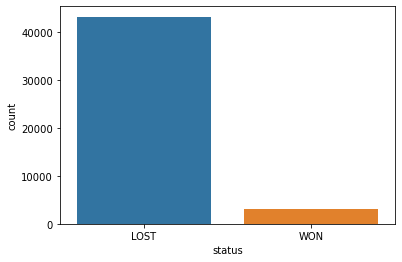

In [190]:
sns.countplot(x="status",data=df)
plt.show()

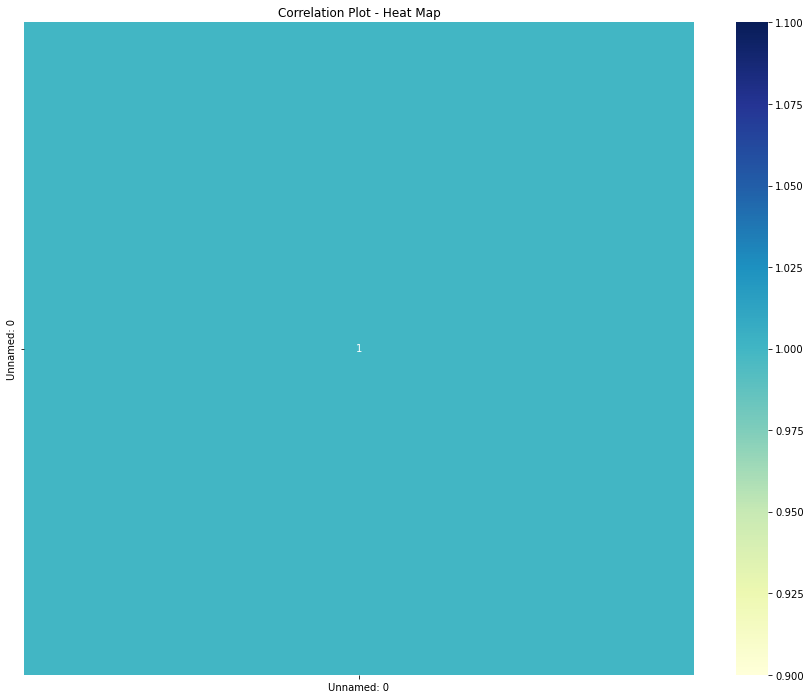

In [191]:
#Correlation using heat map in input Dataset

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot - Heat Map")
plt.show()


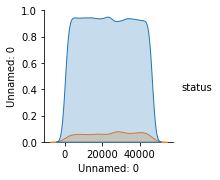

In [192]:
#Pairplot using sns
sns.pairplot(df,hue="status")

In [193]:
#  considering only data which has <10% none values
cols = []

for i in df.columns:
  if df[i].isnull().sum() < len(df)/10:
    cols.append(i)

In [194]:
cols

['Unnamed: 0',
 'Agent_id',
 'status',
 'lost_reason',
 'budget',
 'lease',
 'utm_source',
 'utm_medium',
 'des_city',
 'des_country',
 'lead_id']

In [195]:
#create dataframe of the columns above
df =  df.loc[:,cols]
df.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,NaN,NaN,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,NaN,NaN,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [196]:
# replacing the nan values in the columns with the most frequent values of the particular column :-
df2 = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [197]:
df2.head()

,Unnamed: 0,Agent_id,status,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country,lead_id
0,0,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,cd5dc0d9393f3980d11d4ba6f88f8110c2b7a7f7796307...
1,1,299ae77a4ef350ae0dd37d6bba1c002d03444fb1edb236...,LOST,Low budget,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,b94693673a5f7178d1b114e4004ad52377d3244dd24a3d...
2,2,c213697430c006013012dd2aca82dd9732aa0a1a6bca13...,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,96ea4e2bf04496c044745938c0299c264c3f4ba079e572...
3,3,eac9815a500f908736d303e23aa227f0957177b0e6756b...,LOST,Low budget,0-0,0,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,1d2b34d8add02a182a4129023766ca4585a8ddced0e5b3...
4,4,1deba9e96f404694373de9749ddd1ca8aa7bb823145a6f...,LOST,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...,fc10fffd29cfbe93c55158fb47752a7501c211d253468c...


In [198]:
#Dropping column with less importance
df2 = df2.drop(['Unnamed: 0','Agent_id','lead_id'],axis = 1)
# df2.drop(labels=df2.columns[-1],axis=1,inplace=True)
# df2.drop(labels=df2.columns[0],axis=1,inplace=True)

In [199]:
df2

,status,lost_reason,budget,lease,utm_source,utm_medium,des_city,des_country
0,LOST,Not responding,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
1,LOST,Low budget,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,5372372f3bf5896820cb2819300c3e681820d82c6efc54...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
2,LOST,Not responding,£121 - £180 Per Week,Full Year Course Stay 40 - 44 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,11ab03a1a8c367191355c152f39fe28cae5e426fce49ef...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
3,LOST,Low budget,0-0,0,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,19372fa44c57a01c37a5a8418779ca3d99b0b59731fb35...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
4,LOST,Junk lead,£60 - £120 Per week,Full Year Course Stay 40 - 44 weeks,3d59f7548e1af2151b64135003ce63c0a484c26b9b8b16...,268ad70eb5bc4737a2ae28162cbca30118cc94520e49ef...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
...,...,...,...,...,...,...,...,...
46603,LOST,Low availability,£60 - £120 Per week,Complete Education Year Stay 50 - 52 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,13d4b96b6ee361b737e22404aeecca45f322ba7d4c2c42...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
46604,LOST,Semester stay,£60 - £120 Per week,Summer/Short Stay 8 - 12 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,998c18dc0e513ab0035c7b858e3780bbbead88695a15de...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
46605,LOST,Low availability,£241 - £300 Per week,Full Year Course Stay 40 - 44 weeks,bbdefa2950f49882f295b1285d4fa9dec45fc4144bfb07...,09076eb7665d1fb9389c7c4517fee0b00e43092eb34821...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...
46606,LOST,Low availability,1108,294,7f3fa48ca885678134842fa7456f3ece53a97f843b6101...,abb8e2badd5b6265c3237170cc599257a4f566706715d2...,ecc0e7dc084f141b29479058967d0bc07dee25d9690a98...,8d23a6e37e0a6431a8f1b43a91026dcff51170a89a6512...


In [200]:
#Again checking for null values
df2.isna().sum()

status         0
lost_reason    0
budget         0
lease          0
utm_source     0
utm_medium     0
des_city       0
des_country    0
dtype: int64

In [201]:
# finding the number of unique values of the column :-
for col in df2.columns:

  print(col ," = ",len(df2[col].unique()))

status  =  2
lost_reason  =  30
budget  =  1851
lease  =  311
utm_source  =  34
utm_medium  =  63
des_city  =  219
des_country  =  14


In [202]:
# Unique catagorical values of the lease
df['lease'].unique()

array([nan, 'Full Year Course Stay 40 - 44 weeks', '0', 'semester-stay',
       '51', 'Semester Stay 20 - 24 weeks',
       'Complete Education Year Stay 50 - 52 weeks', 'full-course-stay',
       'full-year-stay', 'Other', '51 weeks', '44', '18',
       'full year stay', '51weeks', 'Summer/Short Stay 8 - 12 weeks',
       '51 weeks \\', 'other', 'short-stay', '52 weeks', '44 weeks', '12',
       '1 year', '96', '43', '20', '294', '20 - 24 weeks', '1 year .',
       '48', '40', 'N51', '6', 'Academic year', '8', '51Weeks',
       '50 weeks', '84', '15 weeks', 'full course', '45', '39', '1',
       '5 weeks', '50', '12-24', '25', '45 weeks', '19', '44-51',
       '6 weeks', 'FULL YEAR', '24-36', '32', '44/week', '42', '3 month',
       '44-51 weeks', '3 months', '24', '6 months', '2 years', '10', '52',
       '2 weeks', '46', 'sem stay', '13', 'lease', 'short stay', '4',
       '52weeks', '69', '16', '50 - 52 weeks', '44 - 51 weeks',
       '4-8 weeks', '4 weeks', '3', 'Full year stay', 

In [203]:
#The are similar unique values,but mentioned different due to spelling mistakes.Correct the spelling mistakes  :-
import re

def correct_spelling(text):
    # replace "sem" or "semester" with "semester"
    text = re.sub(r'\b(sem(?:ester)?)\b', 'semester', text, flags=re.IGNORECASE)
    # replace "stay" or "stya" with "stay"
    text = re.sub(r'\bstay(?:a)?\b', 'stay', text, flags=re.IGNORECASE)
    # replace "full" with "full"
    text = re.sub(r'\b(full)\b', 'full', text, flags=re.IGNORECASE)
    # replace "year" or "yyear" with "year"
    text = re.sub(r'\b(y(?:ea)?r)\b', 'year', text, flags=re.IGNORECASE)
    # replace "short" or "shotr" with "short"
    text = re.sub(r'\b(sh(?:or)?t)\b', 'short', text, flags=re.IGNORECASE)
    # replace "week" or "weeeks" with "week"
    text = re.sub(r'\b(week(?:s)?)\b', 'week', text, flags=re.IGNORECASE)
    text = re.sub(r'\b(\d+\s*weeks?)\b', 'week', text, flags=re.IGNORECASE)
    # replace "month" or "motnhs" with "month"
    text = re.sub(r'\b(month(?:s)?)\b', 'month', text, flags=re.IGNORECASE)
    # replace "long" or "tearm" with "long term"
    text = re.sub(r'\blong\b|\btearm\b', 'long term', text, flags=re.IGNORECASE)
    # replace "academic" with "academic"
    text = re.sub(r'\b(academic)\b', 'academic', text, flags=re.IGNORECASE)
    return text

In [204]:
# correcting the spellings of the lease values :-
df2['lease'] = df2['lease'].apply(correct_spelling)

In [205]:
df['lease'].unique()

array([nan, 'Full Year Course Stay 40 - 44 weeks', '0', 'semester-stay',
       '51', 'Semester Stay 20 - 24 weeks',
       'Complete Education Year Stay 50 - 52 weeks', 'full-course-stay',
       'full-year-stay', 'Other', '51 weeks', '44', '18',
       'full year stay', '51weeks', 'Summer/Short Stay 8 - 12 weeks',
       '51 weeks \\', 'other', 'short-stay', '52 weeks', '44 weeks', '12',
       '1 year', '96', '43', '20', '294', '20 - 24 weeks', '1 year .',
       '48', '40', 'N51', '6', 'Academic year', '8', '51Weeks',
       '50 weeks', '84', '15 weeks', 'full course', '45', '39', '1',
       '5 weeks', '50', '12-24', '25', '45 weeks', '19', '44-51',
       '6 weeks', 'FULL YEAR', '24-36', '32', '44/week', '42', '3 month',
       '44-51 weeks', '3 months', '24', '6 months', '2 years', '10', '52',
       '2 weeks', '46', 'sem stay', '13', 'lease', 'short stay', '4',
       '52weeks', '69', '16', '50 - 52 weeks', '44 - 51 weeks',
       '4-8 weeks', '4 weeks', '3', 'Full year stay', 

In [206]:
def clean_lease(lease_value):

  if re.search(pattern="^[0-9 ]*-[0-9 ]*(weeks|WEEKS|Weeks|Week|week)$",string=lease_value):

    return lease_value[0:re.search("(weeks|WEEKS|Weeks|Week|week)$",string=lease_value).start()]

  elif re.search(pattern="^[0-9 ]*-[0-9 ]*(weeks|WEEKS|Weeks|Week|week)*$",string=lease_value):

    return lease_value[re.search("[0-9 ]*",string=lease_value).start():re.search("^[0-9 ]*",string=lease_value).end()]

  elif re.search(pattern="^[0-9 ]*(weeks|WEEKS|Weeks|Week|week)*$",string=lease_value):

    return lease_value[re.search("[0-9 ]*",string=lease_value).start():re.search("(weeks|WEEKS|Weeks|Week|week)*",string=lease_value).start()]

  else:

    return lease_value

In [207]:
df2.lease.nunique()

223

In [208]:
# Applying regular expression function :-
df2['lease'] = df2['lease'].apply(clean_lease)

In [209]:
df2.budget.unique()

array(['£60 - £120 Per week', '£121 - £180 Per Week', '0-0', ...,
       '400 Per Week', '0-115 or 120', '0-500 PCM'], dtype=object)

In [210]:
#Reduce unique values of budget
def calculate_average(data):
    if re.match(r'£\d+ - £\d+ Per week', data):
        # extract the lower and upper bounds using string manipulation
        lower_bound = float(data.split('£')[1].split(' - ')[0])
        upper_bound = float(data.split('£')[2].split(' ')[0])
        # calculate the average
        average_price = str((lower_bound + upper_bound) / 2)
        return average_price
    elif re.match(r'£\d+ - £\d+ Per Week', data):
        # extract the lower and upper bounds using string manipulation
        lower_bound = float(data.split('£')[1].split(' - ')[0])
        upper_bound = float(data.split('£')[2].split(' ')[0])
        # calculate the average
        average_price = str((lower_bound + upper_bound) / 2)
        return average_price
    else:
        return data

In [211]:
# apply the function to the column and replace the original strings with the averages
df2['budget'] = df2['budget'].apply(calculate_average)

In [212]:
# Seperate X and y
X= df2.drop(['status'],axis=1)
y = df2['status']


In [213]:
#convert categorical columns to numerical
le = LabelEncoder()
y = le.fit_transform(y)
ohe = OneHotEncoder()
X = ohe.fit_transform(X)
X = X.toarray()



In [214]:
# feature scaling
scale = StandardScaler()
X = scale.fit_transform(X)

In [215]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [223]:
log =LogisticRegression()
log.fit(X_train,y_train)

c:\Users\Public\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [224]:
y_pred = log.predict(X_test)

In [226]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [216]:
# Training a Random Forest Regression model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [217]:
# Predicting on the testing set
y_pred = rf.predict(X_test)

In [219]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [227]:
# full classification report of my dataset :-
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12993
           1       0.83      0.89      0.86       903

    accuracy                           0.98     13896
   macro avg       0.91      0.94      0.92     13896
weighted avg       0.98      0.98      0.98     13896



In [228]:
y_p_c = ['LOST' if x < 0 else 'WON' for x in y_pred]

In [229]:
print(y_p_c)

['WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON', 'WON'